In [13]:
import torch
import torch.nn as nn
from torchvision import models
from torchvision.models.resnet import ResNet, Bottleneck
from models.ResNet50 import ResNet50Baseline,StructuredPrunedResNet50FineTune, StructuredThenSparseResNet50
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
from pathlib import Path
import os

In [3]:
state_dict = torch.load("resnet50_baseline_weights.pth", map_location="cpu")
print(state_dict.keys())


odict_keys(['model.conv1.weight', 'model.bn1.weight', 'model.bn1.bias', 'model.bn1.running_mean', 'model.bn1.running_var', 'model.bn1.num_batches_tracked', 'model.layer1.0.conv1.weight', 'model.layer1.0.bn1.weight', 'model.layer1.0.bn1.bias', 'model.layer1.0.bn1.running_mean', 'model.layer1.0.bn1.running_var', 'model.layer1.0.bn1.num_batches_tracked', 'model.layer1.0.conv2.weight', 'model.layer1.0.bn2.weight', 'model.layer1.0.bn2.bias', 'model.layer1.0.bn2.running_mean', 'model.layer1.0.bn2.running_var', 'model.layer1.0.bn2.num_batches_tracked', 'model.layer1.0.conv3.weight', 'model.layer1.0.bn3.weight', 'model.layer1.0.bn3.bias', 'model.layer1.0.bn3.running_mean', 'model.layer1.0.bn3.running_var', 'model.layer1.0.bn3.num_batches_tracked', 'model.layer1.0.downsample.0.weight', 'model.layer1.0.downsample.1.weight', 'model.layer1.0.downsample.1.bias', 'model.layer1.0.downsample.1.running_mean', 'model.layer1.0.downsample.1.running_var', 'model.layer1.0.downsample.1.num_batches_tracked', 

In [ ]:

torch.serialization.add_safe_globals({
    "ResNet": ResNet,
    "Bottleneck": Bottleneck,
    "ResNet50Baseline": ResNet50Baseline,
    "StructuredThenSparseResNet50": StructuredThenSparseResNet50,
    "StructuredPrunedResNet50FineTune": StructuredPrunedResNet50FineTune 
})


bModel = ResNet50Baseline()

state_dict = torch.load("resnet50_baseline_weights.pth", map_location="cpu")
clean_state_dict = {k.replace("model.", ""): v for k, v in state_dict.items()}
bModel.model.load_state_dict(clean_state_dict)
bModel.model.eval()




/Users/lynnning/miniforge3/envs/resnet_pruning/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/lynnning/miniforge3/envs/resnet_pruning/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Unfroze layer: layer4.2.bn3.bias
Unfroze layer: fc.1.weight
Unfroze layer: fc.1.bias


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [6]:
structured_model = torch.load("resnet50_structured_pruned_finetuned_model.pth", weights_only=False, map_location="cpu")
structured_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

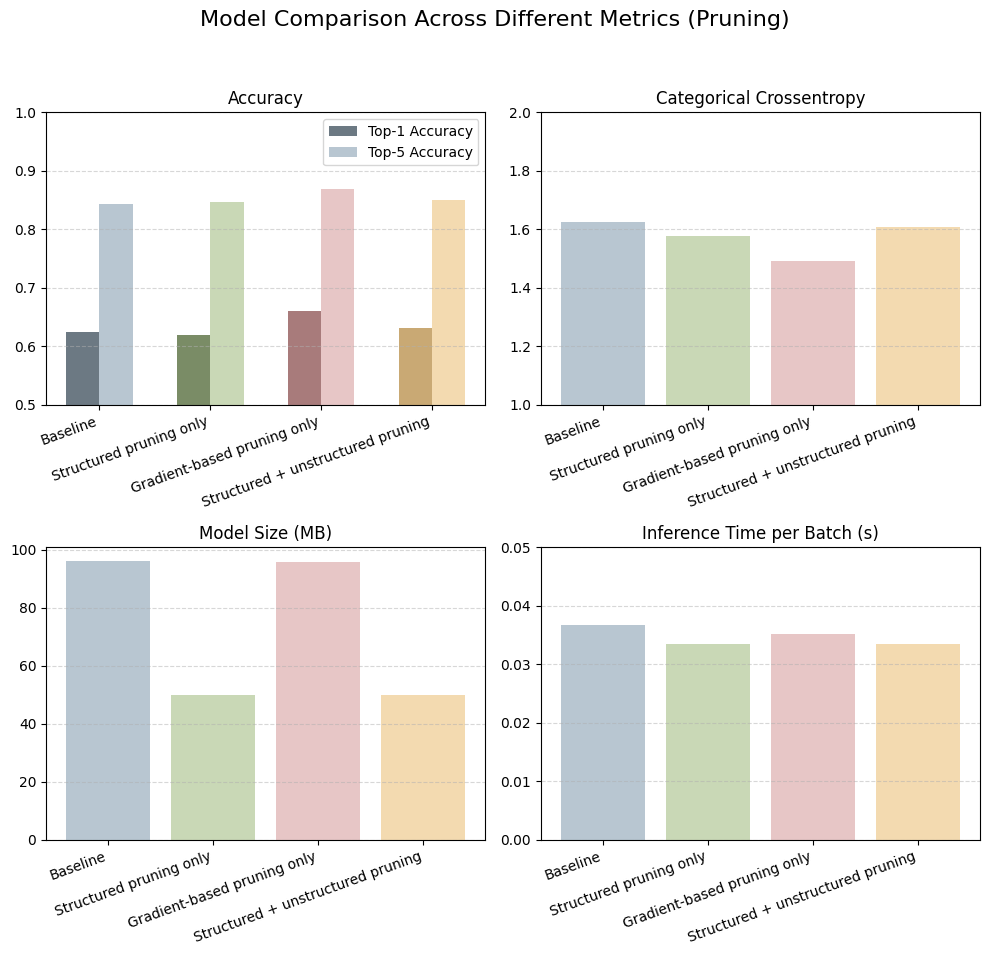

In [ ]:

df = pd.read_csv('model_comparison_metrics.csv')

morandi_colors = {
    'Baseline': ('#b8c6d1', '#6c7983'),  # light gray-blue, deep slate
    'Structured pruning only': ('#c9d8b6', '#7a8c66'),  # pale sage, olive green
    'Gradient-based pruning only': ('#e7c6c6', '#a87b7b'),  # dusty rose, muted wine
    'Structured + unstructured pruning': ('#f3dab0', '#c9a974'),  # sand, caramel
}

top1_colors = [morandi_colors[model][1] for model in df['Model']] 
top5_colors = [morandi_colors[model][0] for model in df['Model']]  
bar_colors = [morandi_colors[model][0] for model in df['Model']]  

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Model Comparison Across Different Metrics (Pruning)', fontsize=16)
x = np.arange(len(df['Model']))

# --- Accuracy ---
axs[0, 0].bar(x - 0.15, df['Top-1 Accuracy'], width=0.3, label='Top-1 Accuracy', color=top1_colors)
axs[0, 0].bar(x + 0.15, df['Top-5 Accuracy'], width=0.3, label='Top-5 Accuracy', color=top5_colors)
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(df['Model'], rotation=20, ha='right')
axs[0, 0].set_ylim(0.5, 1.0)
axs[0, 0].legend()
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.5)

# --- Crossentropy ---
crossentropy = df['Categorical Crossentropy']
axs[0, 1].bar(x, crossentropy, color=bar_colors)
axs[0, 1].set_title('Categorical Crossentropy')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(df['Model'], rotation=20, ha='right')
axs[0, 1].set_ylim(1, 2)
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.5)

# --- Model Size ---
axs[1, 0].bar(x, df['Model Size (MB)'], color=bar_colors)
axs[1, 0].set_title('Model Size (MB)')
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(df['Model'], rotation=20, ha='right')
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.5)

# --- Inference Time ---
axs[1, 1].bar(x, df['Inference Time per Batch (s)'], color=bar_colors)
axs[1, 1].set_title('Inference Time per Batch (s)')
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(df['Model'], rotation=20, ha='right')
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.5)
axs[1, 1].set_ylim(0, 0.05)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Visualize the Strcutured pruning result

In [ ]:

def count_leaf_layers(model):
    return sum(1 for m in model.modules() if len(list(m.children())) == 0)

# Count layers
baseline_layers = count_leaf_layers(bModel.model)
structured_layers = count_leaf_layers(structured_model)

print(f"Baseline model layers: {baseline_layers}")
print(f"Structured pruned model layers: {structured_layers}")


Baseline model layers: 127
Structured pruned model layers: 127


In [9]:
baseline_params = sum(p.numel() for p in bModel.model.parameters())
structured_params = sum(p.numel() for p in structured_model.parameters())

print(f"Baseline params: {baseline_params / 1e6:.2f}M")
print(f"Structured pruned params: {structured_params / 1e6:.2f}M")


Baseline params: 23.92M
Structured pruned params: 12.40M


In [10]:
def print_conv_shapes(model):
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv2d):
            print(f"{name}: {module.in_channels} -> {module.out_channels}")

print("Baseline Conv Layers:")
print_conv_shapes(bModel.model)

print("\nStructured Pruned Conv Layers:")
print_conv_shapes(structured_model)


Baseline Conv Layers:
conv1: 3 -> 64
layer1.0.conv1: 64 -> 64
layer1.0.conv2: 64 -> 64
layer1.0.conv3: 64 -> 256
layer1.0.downsample.0: 64 -> 256
layer1.1.conv1: 256 -> 64
layer1.1.conv2: 64 -> 64
layer1.1.conv3: 64 -> 256
layer1.2.conv1: 256 -> 64
layer1.2.conv2: 64 -> 64
layer1.2.conv3: 64 -> 256
layer2.0.conv1: 256 -> 128
layer2.0.conv2: 128 -> 128
layer2.0.conv3: 128 -> 512
layer2.0.downsample.0: 256 -> 512
layer2.1.conv1: 512 -> 128
layer2.1.conv2: 128 -> 128
layer2.1.conv3: 128 -> 512
layer2.2.conv1: 512 -> 128
layer2.2.conv2: 128 -> 128
layer2.2.conv3: 128 -> 512
layer2.3.conv1: 512 -> 128
layer2.3.conv2: 128 -> 128
layer2.3.conv3: 128 -> 512
layer3.0.conv1: 512 -> 256
layer3.0.conv2: 256 -> 256
layer3.0.conv3: 256 -> 1024
layer3.0.downsample.0: 512 -> 1024
layer3.1.conv1: 1024 -> 256
layer3.1.conv2: 256 -> 256
layer3.1.conv3: 256 -> 1024
layer3.2.conv1: 1024 -> 256
layer3.2.conv2: 256 -> 256
layer3.2.conv3: 256 -> 1024
layer3.3.conv1: 1024 -> 256
layer3.3.conv2: 256 -> 256
laye

ModuleNotFoundError: No module named 'ace_tools'

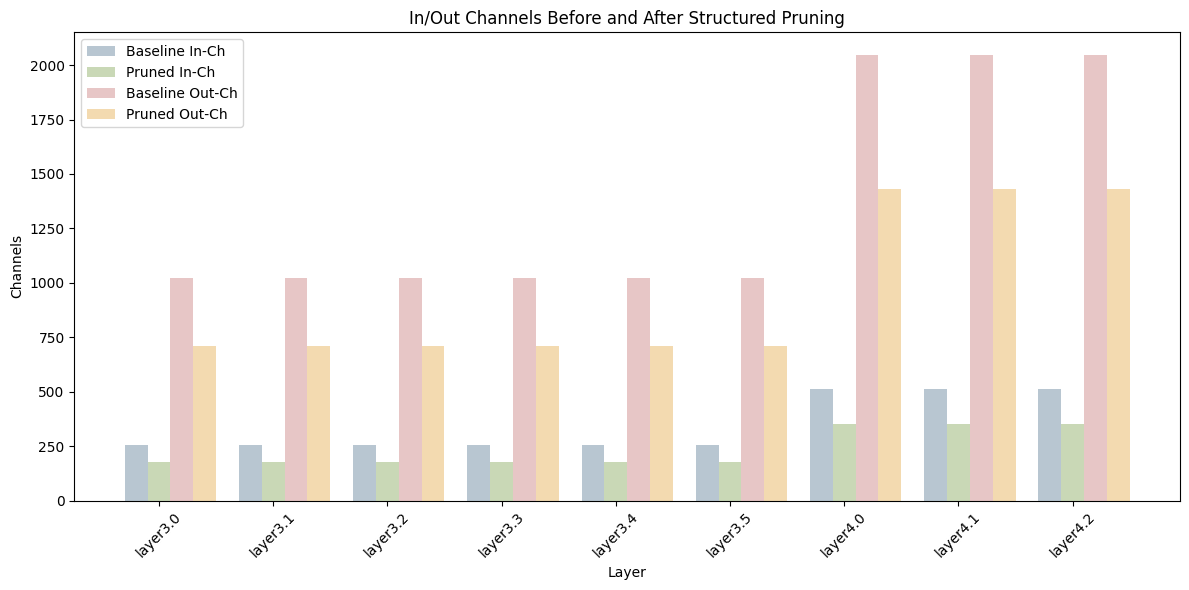

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Define layer names and shapes from both baseline and structured-pruned models
baseline_layers = {
    'layer3.0': (256, 1024),
    'layer3.1': (256, 1024),
    'layer3.2': (256, 1024),
    'layer3.3': (256, 1024),
    'layer3.4': (256, 1024),
    'layer3.5': (256, 1024),
    'layer4.0': (512, 2048),
    'layer4.1': (512, 2048),
    'layer4.2': (512, 2048)
}

pruned_layers = {
    'layer3.0': (176, 712),
    'layer3.1': (176, 712),
    'layer3.2': (176, 712),
    'layer3.3': (176, 712),
    'layer3.4': (176, 712),
    'layer3.5': (176, 712),
    'layer4.0': (352, 1432),
    'layer4.1': (352, 1432),
    'layer4.2': (352, 1432)
}

# Prepare a dataframe for plotting
layers = list(baseline_layers.keys())
df = pd.DataFrame({
    'Layer': layers,
    'Baseline In-Channels': [baseline_layers[l][0] for l in layers],
    'Baseline Out-Channels': [baseline_layers[l][1] for l in layers],
    'Pruned In-Channels': [pruned_layers[l][0] for l in layers],
    'Pruned Out-Channels': [pruned_layers[l][1] for l in layers],
})

# Colors
baseline_light = '#b8c6d1'
structured_light = '#c9d8b6'

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2
index = range(len(df))

# In-channels
ax.bar([i - bar_width for i in index], df['Baseline In-Channels'], width=bar_width, label='Baseline In-Ch', color=baseline_light)
ax.bar(index, df['Pruned In-Channels'], width=bar_width, label='Pruned In-Ch', color=structured_light)

# Out-channels
ax.bar([i + bar_width for i in index], df['Baseline Out-Channels'], width=bar_width, label='Baseline Out-Ch', color='#e7c6c6')
ax.bar([i + 2*bar_width for i in index], df['Pruned Out-Channels'], width=bar_width, label='Pruned Out-Ch', color='#f3dab0')

ax.set_xlabel("Layer")
ax.set_ylabel("Channels")
ax.set_title("In/Out Channels Before and After Structured Pruning")
ax.set_xticks(index)
ax.set_xticklabels(df['Layer'], rotation=45)
ax.legend()
plt.tight_layout()

import ace_tools as tools; tools.display_dataframe_to_user(name="Layer Channel Comparison", dataframe=df)
plt.show()


## Visualization across different model

In [18]:
model_base_path = Path.cwd() / Path("./saved_models/resnet")
model_size = {
    "baseline": (model_base_path /"resnet50_baseline_model.pth").stat().st_size / 1e6,
    "baseline_dy": (model_base_path / "resnet50_base_dy_quant_model.pth").stat().st_size / 1e6,
    "baseline_st": (model_base_path / "resnet50_base_st_quant_model.pth").stat().st_size / 1e6,
    "baseline_sparse_prun": (model_base_path / "resnet50_structured_pruned_SparseML40%_finalized_model.pth").stat().st_size / 1e6,
    "sparse_prun_dy_quant": (model_base_path / "resnet50_sparse_prun_dy_quant_model.pth").stat().st_size / 1e6,
    "sparse_prun_st_quant": (model_base_path / "resnet50_sparse_prun_st_quant_model.pth").stat().st_size / 1e6
}

In [19]:
model_size

{'baseline': 96.017522,
 'baseline_dy': 94.430128,
 'baseline_st': 24.516948,
 'baseline_sparse_prun': 49.91723,
 'sparse_prun_dy_quant': 48.763726,
 'sparse_prun_st_quant': 24.518726}

          Configuration  top1_acc  top5_acc  total_inference_time  \
0              baseline    0.6242    0.8429           1412.303999   
1           baseline_dy    0.6238    0.8429           1416.166142   
2           baseline_st    0.6219    0.8425            353.277013   
3  baseline_sparse_prun    0.6318    0.8495           1249.007884   
4  sparse_prun_dy_quant    0.6313    0.8490           1152.825608   
5  sparse_prun_st_quant    0.6219    0.8425            349.168644   

   average_inference_time  average_loss  total_batches all_losses  \
0                8.995567    103.421392            157         []   
1                9.020167    103.409660            157         []   
2                2.250172    103.220404            157         []   
3                7.955464    107.346475            157         []   
4                7.342838    107.387606            157         []   
5                2.224004    103.220404            157         []   

  all_top1_acc inference_times t

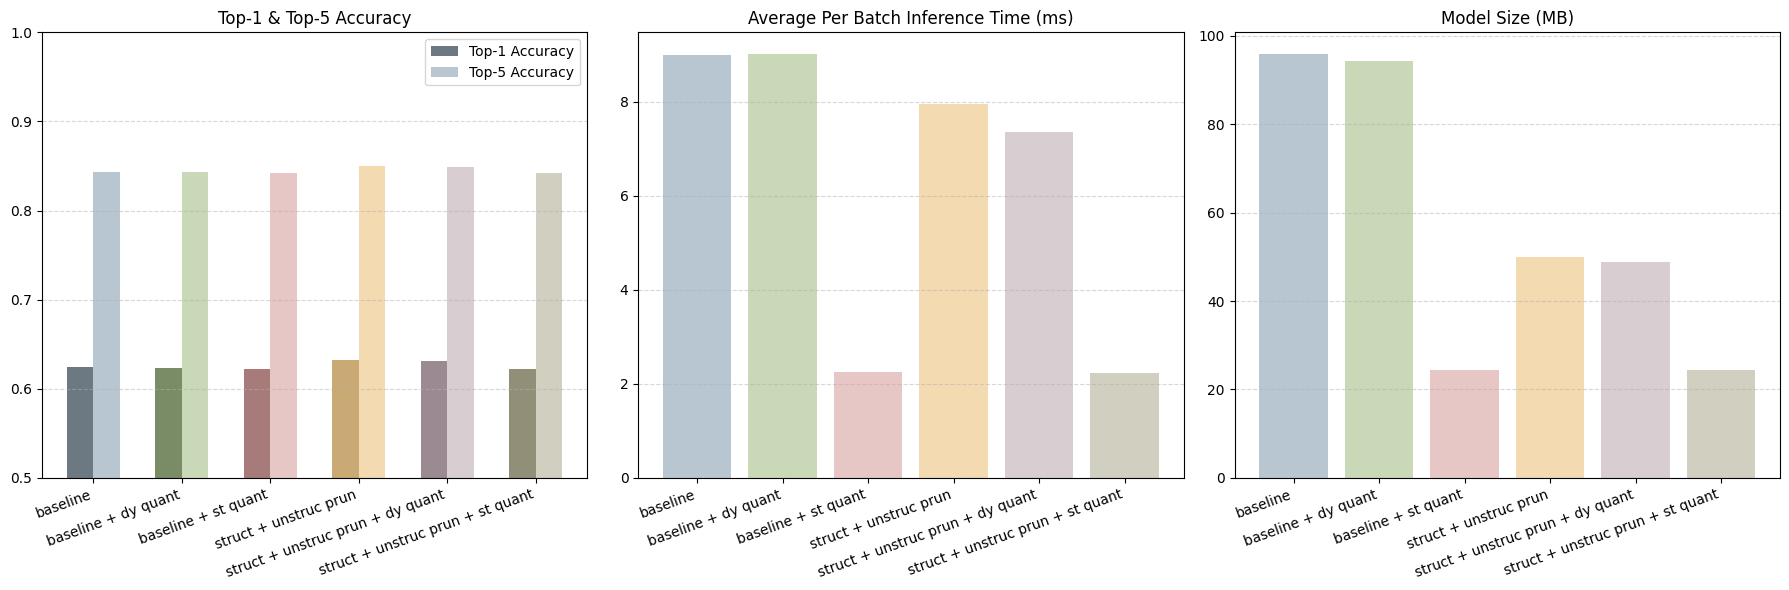

In [28]:
# Reload the updated JSON file
plot_path = Path.cwd() / Path("plots/resNet50")
metrics_path = Path("./model_metrics/resnet50")
file_names = ["baseline_metrics.json", "baseline_dy_metrics.json", "baseline_st_metrics.json", 
              "baseline_sparse_prun_metrics.json", "sparse_prun_dy_quant_metrics.json", "sparse_prun_st_quant_metrics.json"]
final_dict = {}
for fname in file_names:
    path = metrics_path / fname
    key = fname.replace("_metrics.json", "")
    with path.open("r") as f:
        final_dict[key] = json.load(f)
    final_dict[key]['size'] = model_size[key]

# file_path_updated = "resnet_quantized_metrics.json"
# with open(file_path_updated, "r") as file:
#     updated_data = json.load(file)

# Convert to DataFrame
df_updated = pd.DataFrame.from_dict(final_dict, orient='index')
df_updated.reset_index(inplace=True)
df_updated.rename(columns={'index': 'Configuration'}, inplace=True)
print(df_updated)

# Define Morandi-inspired color palette (light/dark pairs)
morandi_colors = {
    'baseline': ('#b8c6d1', '#6c7983'),
    'baseline_dy': ('#c9d8b6', '#7a8c66'),
    'baseline_st': ('#e7c6c6', '#a87b7b'),
    'baseline_sparse_prun': ('#f3dab0', '#c9a974'),
    'sparse_prun_dy_quant': ('#d8cdd1', '#9c8a92'),
    'sparse_prun_st_quant': ('#d1cfc0', '#928f79')
}

top1_colors = [morandi_colors[conf][1] for conf in df_updated['Configuration']]
top5_colors = [morandi_colors[conf][0] for conf in df_updated['Configuration']]
bar_colors = [morandi_colors[conf][0] for conf in df_updated['Configuration']]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
x = np.arange(len(df_updated))

# --- Top-1 & Top-5 Accuracy ---
axs[0].bar(x - 0.15, df_updated['top1_acc'], width=0.3, label='Top-1 Accuracy', color=top1_colors)
axs[0].bar(x + 0.15, df_updated['top5_acc'], width=0.3, label='Top-5 Accuracy', color=top5_colors)
axs[0].set_title('Top-1 & Top-5 Accuracy')
axs[0].set_xticks(x)
axs[0].set_xticklabels(df_updated['Configuration'].replace(
    {
        "baseline_dy": "baseline + dy quant",
        "baseline_st": "baseline + st quant",
        "baseline_sparse_prun": "struct + unstruc prun",
        "sparse_prun_dy_quant": "struct + unstruc prun + dy quant",
        "sparse_prun_st_quant": "struct + unstruc prun + st quant"
    }
), rotation=20, ha='right')
axs[0].set_ylim(0.5, 1.0)
axs[0].legend()
axs[0].grid(axis='y', linestyle='--', alpha=0.5)

# --- Inference Time ---
axs[1].bar(x, df_updated['average_inference_time'], color=bar_colors)
axs[1].set_title('Average Per Batch Inference Time (ms)')
axs[1].set_xticks(x)
axs[1].set_xticklabels(df_updated['Configuration'].replace(
    {
        "baseline_dy": "baseline + dy quant",
        "baseline_st": "baseline + st quant",
        "baseline_sparse_prun": "struct + unstruc prun",
        "sparse_prun_dy_quant": "struct + unstruc prun + dy quant",
        "sparse_prun_st_quant": "struct + unstruc prun + st quant"
    }
), rotation=20, ha='right')
axs[1].grid(axis='y', linestyle='--', alpha=0.5)

# --- Model Size ---
axs[2].bar(x, df_updated['size'], color=bar_colors)
axs[2].set_title('Model Size (MB)')
axs[2].set_xticks(x)
axs[2].set_xticklabels(df_updated['Configuration'].replace(
    {
        "baseline_dy": "baseline + dy quant",
        "baseline_st": "baseline + st quant",
        "baseline_sparse_prun": "struct + unstruc prun",
        "sparse_prun_dy_quant": "struct + unstruc prun + dy quant",
        "sparse_prun_st_quant": "struct + unstruc prun + st quant"
    }
), rotation=20, ha='right')
axs[2].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
# plt.show()
plt.savefig(plot_path / "restNet50_combined_comparison.png")

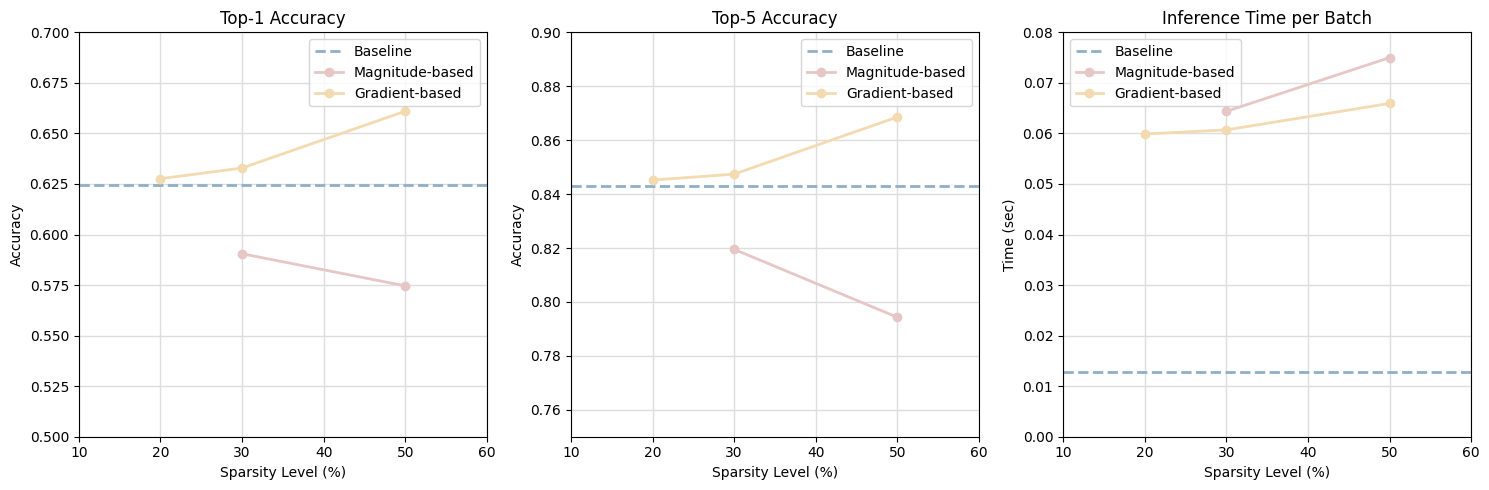

In [ ]:
# Reload the JSON data
with open("pytorch_unstructured_pruned_metrics.json", "r") as f:
    metrics = json.load(f)

# Extract sparsity levels and metrics
magnitude_sparsity = [30, 50]
gradient_sparsity = [20, 30, 50]

baseline_top1 = metrics["baseline"]["top1_accuracy"]
baseline_top5 = metrics["baseline"]["top5_accuracy"]
baseline_time = metrics["baseline"]["inference_time_per_batch_sec"]

magnitude_top1 = [metrics[f"magnitude_{s}%_prune"]["top1_accuracy"] for s in magnitude_sparsity]
magnitude_top5 = [metrics[f"magnitude_{s}%_prune"]["top5_accuracy"] for s in magnitude_sparsity]
magnitude_time = [metrics[f"magnitude_{s}%_prune"]["inference_time_per_batch_sec"] for s in magnitude_sparsity]

gradient_top1 = [metrics[f"gradient_{s}%_prune"]["top1_accuracy"] for s in gradient_sparsity]
gradient_top5 = [metrics[f"gradient_{s}%_prune"]["top5_accuracy"] for s in gradient_sparsity]
gradient_time = [metrics[f"gradient_{s}%_prune"]["inference_time_per_batch_sec"] for s in gradient_sparsity]

# Morandi colors (light tones)
morandi_colors = {
    'baseline': '#8fafc7',
    'magnitude': '#e7c6c6',
    'gradient': '#f3dab0'
}

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Top-1 Accuracy
axs[0].axhline(y=baseline_top1, color=morandi_colors["baseline"], linestyle="--", label="Baseline", linewidth=2)
axs[0].plot(magnitude_sparsity, magnitude_top1, marker="o", color=morandi_colors["magnitude"], label="Magnitude-based",linewidth=2)
axs[0].plot(gradient_sparsity, gradient_top1, marker="o", color=morandi_colors["gradient"], label="Gradient-based",linewidth=2)
axs[0].set_title("Top-1 Accuracy")
axs[0].set_xlabel("Sparsity Level (%)")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].grid(True)
axs[0].set_xlim(10, 60)
axs[0].set_ylim(0.5, 0.7)  

# Top-5 Accuracy
axs[1].axhline(y=baseline_top5, color=morandi_colors["baseline"], linestyle="--", label="Baseline",linewidth=2)
axs[1].plot(magnitude_sparsity, magnitude_top5, marker="o", color=morandi_colors["magnitude"], label="Magnitude-based",linewidth=2)
axs[1].plot(gradient_sparsity, gradient_top5, marker="o", color=morandi_colors["gradient"], label="Gradient-based",linewidth=2)
axs[1].set_title("Top-5 Accuracy")
axs[1].set_xlabel("Sparsity Level (%)")
axs[1].set_ylabel("Accuracy")
axs[1].legend()
axs[1].grid(True)
axs[1].set_ylim(0.75, 0.9)  
axs[1].set_xlim(10, 60)

# Inference Time
axs[2].axhline(y=baseline_time, color=morandi_colors["baseline"], linestyle="--", label="Baseline", linewidth=2)
axs[2].plot(magnitude_sparsity, magnitude_time, marker="o", color=morandi_colors["magnitude"], label="Magnitude-based",linewidth=2)
axs[2].plot(gradient_sparsity, gradient_time, marker="o", color=morandi_colors["gradient"], label="Gradient-based",linewidth=2)
axs[2].set_title("Inference Time per Batch")
axs[2].set_xlabel("Sparsity Level (%)")
axs[2].set_ylabel("Time (sec)")
axs[2].legend()
axs[2].grid(True)
axs[2].set_xlim(10, 60)
axs[2].set_ylim(0, 0.08)  

for ax in axs:
    ax.grid(True, color='#dddddd', linestyle='-', linewidth=1)


plt.tight_layout()
plt.show()


# Training data visualization

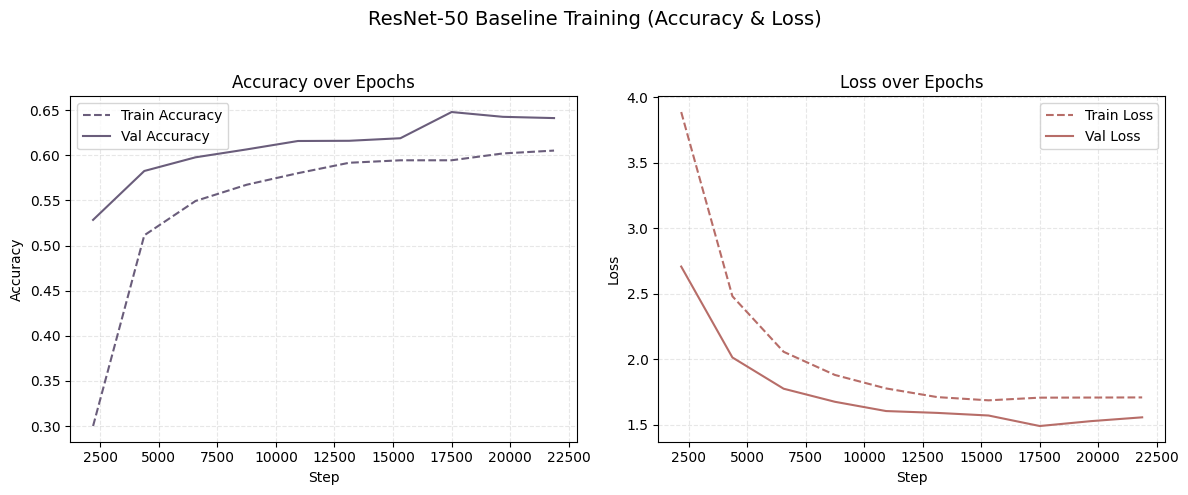

In [ ]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Function to extract scalar values from TensorBoard logs
def extract_metric(log_dir, metric_name):
    ea = EventAccumulator(log_dir)
    ea.Reload()
    
    if metric_name not in ea.Tags()['scalars']:
        print(f"Metric '{metric_name}' not found in {log_dir}")
        return [], []
    
    events = ea.Scalars(metric_name)
    steps = [e.step for e in events]
    values = [e.value for e in events]
    return steps, values

# Define log path
log_dir = "tb_logs/resnet50Baseline/version_10"

# Extract metrics
train_steps_acc, train_acc = extract_metric(log_dir, "train_acc")
val_steps_acc, val_acc = extract_metric(log_dir, "val_acc")
train_steps_loss, train_loss = extract_metric(log_dir, "train_loss")
val_steps_loss, val_loss = extract_metric(log_dir, "val_loss")

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy subplot
axes[0].plot(train_steps_acc, train_acc, label="Train Accuracy", color="#6A5D7B", linestyle="--")
axes[0].plot(val_steps_acc, val_acc, label="Val Accuracy", color="#6A5D7B", linestyle="-")
axes[0].set_title("Accuracy over Epochs")
axes[0].set_xlabel("Step")
axes[0].set_ylabel("Accuracy")
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.3)

# Loss subplot
axes[1].plot(train_steps_loss, train_loss, label="Train Loss", color="#B76D68", linestyle="--")
axes[1].plot(val_steps_loss, val_loss, label="Val Loss", color="#B76D68", linestyle="-")
axes[1].set_title("Loss over Epochs")
axes[1].set_xlabel("Step")
axes[1].set_ylabel("Loss")
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.3)

plt.suptitle("ResNet-50 Baseline Training (Accuracy & Loss)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


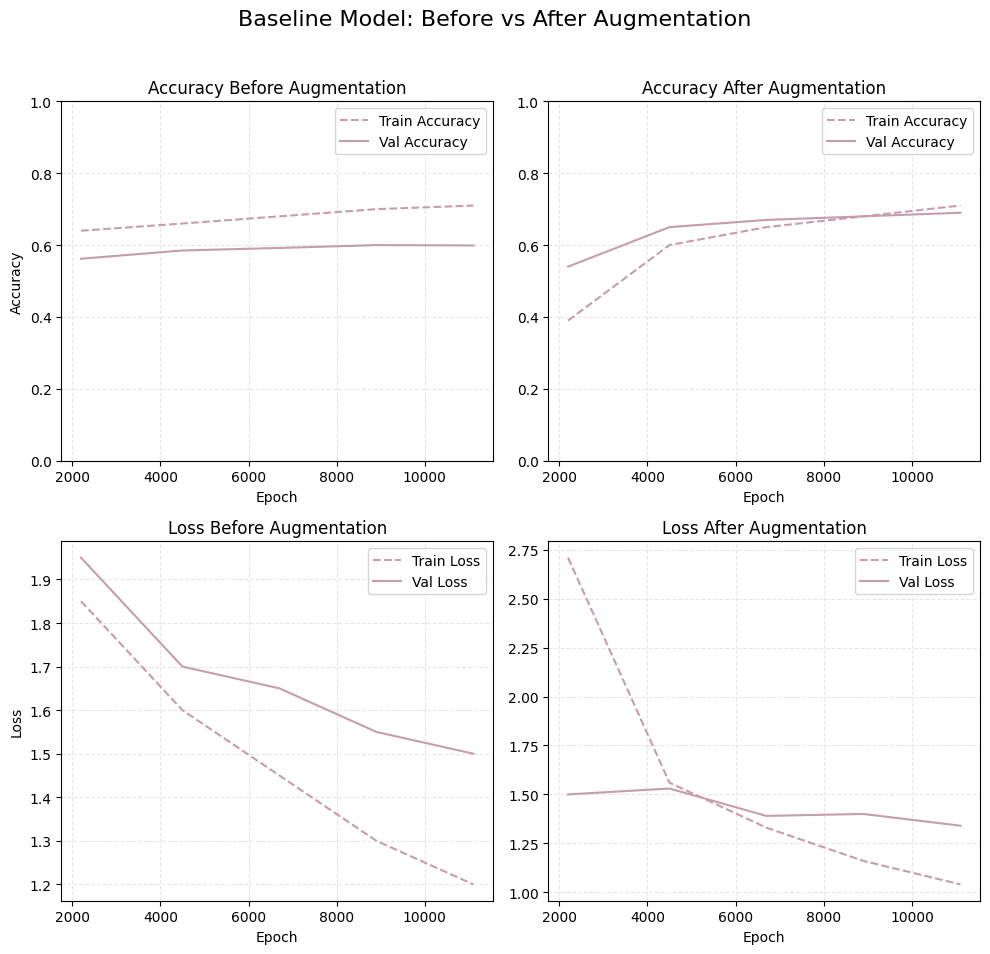

In [7]:
import matplotlib.pyplot as plt

# Epochs
epochs = [2200, 4500, 6700, 8900, 11100]

# Accuracy - Baseline (Before Augmentation)
baseline_train_acc_before_augmentation = [0.64, 0.66, 0.68, 0.70, 0.71]
baseline_val_acc_before_augmentation = [0.562, 0.585, 0.592, 0.600, 0.599]

# Loss - Baseline (Before Augmentation)
baseline_train_loss_before_augmentation = [1.85, 1.60, 1.45, 1.30, 1.20]
baseline_val_loss_before_augmentation = [1.95, 1.70, 1.65, 1.55, 1.50]

# Accuracy - Baseline (After Augmentation)
baseline_train_acc_after_augmentation = [0.39, 0.60, 0.65, 0.68, 0.71]
baseline_val_acc_after_augmentation = [0.54, 0.65, 0.67, 0.68, 0.69]

# Loss - Baseline (After Augmentation)
baseline_train_loss_after_augmentation = [2.71, 1.56, 1.33, 1.16, 1.04]
baseline_val_loss_after_augmentation = [1.50, 1.53, 1.39, 1.40, 1.34]

# Plot setup
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
color = "#C59DAE"  # muted mauve

# 1. Accuracy before augmentation
axes[0, 0].plot(epochs, baseline_train_acc_before_augmentation, label="Train Accuracy", linestyle='--', color=color)
axes[0, 0].plot(epochs, baseline_val_acc_before_augmentation, label="Val Accuracy", linestyle='-', color=color)
axes[0, 0].set_title("Accuracy Before Augmentation")
axes[0, 0].set_ylim(0, 1)
axes[0, 0].set_xlabel("Epoch")
axes[0, 0].set_ylabel("Accuracy")
axes[0, 0].legend()
axes[0, 0].grid(True, linestyle="--", alpha=0.3)

# 2. Accuracy after augmentation
axes[0, 1].plot(epochs, baseline_train_acc_after_augmentation, label="Train Accuracy", linestyle='--', color=color)
axes[0, 1].plot(epochs, baseline_val_acc_after_augmentation, label="Val Accuracy", linestyle='-', color=color)
axes[0, 1].set_title("Accuracy After Augmentation")
axes[0, 1].set_ylim(0, 1)
axes[0, 1].set_xlabel("Epoch")
axes[0, 1].legend()
axes[0, 1].grid(True, linestyle="--", alpha=0.3)

# 3. Loss before augmentation
axes[1, 0].plot(epochs, baseline_train_loss_before_augmentation, label="Train Loss", linestyle='--', color=color)
axes[1, 0].plot(epochs, baseline_val_loss_before_augmentation, label="Val Loss", linestyle='-', color=color)
axes[1, 0].set_title("Loss Before Augmentation")
axes[1, 0].set_xlabel("Epoch")
axes[1, 0].set_ylabel("Loss")
axes[1, 0].legend()
axes[1, 0].grid(True, linestyle="--", alpha=0.3)

# 4. Loss after augmentation
axes[1, 1].plot(epochs, baseline_train_loss_after_augmentation, label="Train Loss", linestyle='--', color=color)
axes[1, 1].plot(epochs, baseline_val_loss_after_augmentation, label="Val Loss", linestyle='-', color=color)
axes[1, 1].set_title("Loss After Augmentation")
axes[1, 1].set_xlabel("Epoch")
axes[1, 1].legend()
axes[1, 1].grid(True, linestyle="--", alpha=0.3)

# Final layout
fig.suptitle("Baseline Model: Before vs After Augmentation", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()
